<a href="https://colab.research.google.com/github/RafiKepecs/Bayesian-Machine-Learning/blob/main/Project%206%3A%20MCMC/BayesML_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

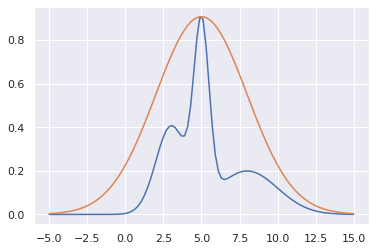

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


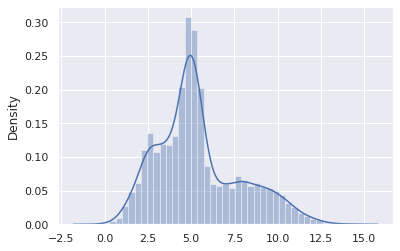

In [ ]:
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.set()
 
def p(x):
    return sum(norm.pdf(x, mu[i], sig[i]) for i in range(len(mu)))
 
# proposed Distribution
def q(x):
    return norm.pdf(x, mu_proposed, sig_proposed)
 
mu = [3, 8, 5]
sig = [1, 2, 0.5]
 
 
mu_proposed = 5
sig_proposed = 3
 
x = np.linspace(-5, 15, 100)
k = max(p(x) / q(x))
 
def rejection_sampling(n_samples):
    samples = []
 
    z = np.random.normal(mu_proposed, sig_proposed, n_samples)
    u = np.random.uniform(0, k*q(z), n_samples)
 
    for i in range(n_samples):
        if u[i] <= p(z[i]):
            samples.append(z[i])
 
    return np.array(samples)
 
plt.plot(x, p(x))
plt.plot(x, k*q(x))
plt.show()
 
s = rejection_sampling(10000)
sns.distplot(s)

In [ ]:
import numpy as np
from scipy.stats import norm, multivariate_normal, lognorm
from matplotlib import pyplot as plt

N = 25
beta = 25

X = np.random.rand(N, 1) 
noise = np.random.normal(0, np.sqrt(1/beta), N)
w1 = 2
w2 = -2
f_obs = w1+w2*X#0.5 + np.sin(2 * np.pi * X)
t = np.array([f_obs[i] + noise[i] for i in range(N)])

psi = np.array([[1,x] for x in X]).reshape(25,2)


def log_likelihood(w, t=t, psi=psi):
    #return sum([np.log(norm.pdf(t[i], w@psi[i], 1/beta)) for i in range(len(t))])
    return sum([lognorm.pdf(t[i], np.array(w@psi[i])[0], 1/beta) for i in range(len(t))])


def A(z_star, z_tau):
    p_star = log_likelihood(z_star, t, psi)
    p_tau = log_likelihood(z_tau, t, psi)
    return min(1, p_star/p_tau)


def MCMC(n_iterations, mu_proposal, sig_proposal):
    
    proposal = multivariate_normal(mu_proposal, sig_proposal)
    weights = proposal.rvs(n_iterations, 123)
    
    z_tau = []
    z_star = []
    
    z_tau.append(np.random.uniform(0,1,size=2))
    
    for i in range(n_iterations):
        
        z_star.append(weights[i])
        
        p = A(z_star, z_tau)
        
        u = np.random.uniform(0,1)
        
        if p > u:
            z_tau.append(z_star[-1])
            
    return z_tau
            



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


Text(0, 0.5, 'w1')

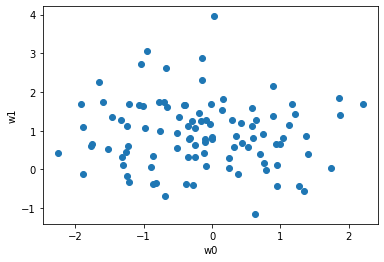

In [ ]:
mu_proposal = [0,1]
sig_proposal =  [[1,0],[0,1]]           
samples = MCMC(200, mu_proposal, sig_proposal)


samples = np.array(samples)
plt.scatter(samples[100:, 0], samples[100:,1])
plt.xlabel("w0")
plt.ylabel("w1")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in true_divide


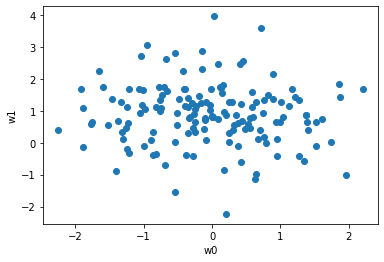

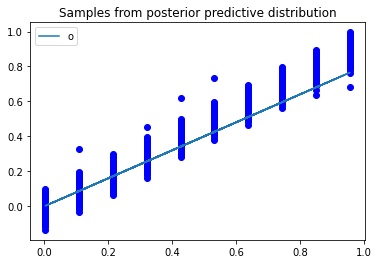

In [ ]:
import numpy as np
from scipy.stats import norm, multivariate_normal, lognorm
from matplotlib import pyplot as plt

N = 25
beta = 25

X = np.random.rand(N, 1) 
noise = np.random.normal(0, np.sqrt(1/beta), N)
w1 = 0.0
w2 = 0.8
f_obs = w1+w2*X
t = np.array([f_obs[i] + noise[i] for i in range(N)])

psi = np.array([[1,x] for x in X]).reshape(25,2)


def log_likelihood(w, t=t, psi=psi):
    #return sum([np.log(norm.pdf(t[i], w@psi[i], 1/beta)) for i in range(len(t))])
    return sum([lognorm.pdf(t[i], np.array(w@psi[i])[0], 1/beta) for i in range(len(t))])


def A(z_star, z_tau):
    p_star = log_likelihood(z_star, t, psi)
    p_tau = log_likelihood(z_tau, t, psi)
    return min(1, p_star/p_tau)


def MCMC(n_iterations, mu_proposal, sig_proposal):
    
    proposal = multivariate_normal(mu_proposal, sig_proposal)
    weights = proposal.rvs(n_iterations, 123)
    
    z_tau = []
    z_star = []
    
    z_tau.append(np.random.uniform(0,1,size=2))
    
    for i in range(n_iterations):
        
        z_star.append(weights[i])
        
        p = A(z_star, z_tau)
        
        u = np.random.uniform(0,1)
        
        if p > u:
            z_tau.append(z_star[-1])
            
    return z_tau
            
mu_proposal = [0,1]
sig_proposal =  [[1,0],[0,1]]           
samples = MCMC(200, mu_proposal, sig_proposal)


samples = np.array(samples)
plt.scatter(samples[50:, 0], samples[50:,1])
plt.xlabel("w0")
plt.ylabel("w1")

#%% Sampling from the posterior predictive distribution
psi_new = np.array([[1] for x in X]).reshape(25,1)


def log_likelihood_new(w, t, psi):
    #return sum([np.log(norm.pdf(t[i], w@psi[i], 1/beta)) for i in range(len(t))])
    return sum([lognorm.pdf(t[i], w[-1], 1/beta) for i in range(len(t))])


def A_new(z_star, z_tau):
    p_star = log_likelihood_new(z_star, t, psi_new)
    p_tau = log_likelihood_new(z_tau, t, psi_new)
    return min(1, p_star/p_tau)


def MCMC_1D(n_iterations, mu_proposal, sig_proposal):
    
    proposal = norm(mu_proposal, sig_proposal)
    targets = proposal.rvs(n_iterations, 123)
    
    z_tau = []
    z_star = []
    
    z_tau.append(np.random.uniform(0,1))
    
    for i in range(n_iterations):
        
        z_star.append(targets[i])
        
        p = A_new(np.array(z_star), np.array(z_tau))
        
        u = np.random.uniform(0,1)
        
        if p > u:
            z_tau.append(z_star[-1])
            
    return z_tau

X_space = np.linspace(0, 1, 10).reshape(10,1)
target_samples = []

'''
for w in samples:
    w_t_samples = []
    for x in X_space:
        mean = w[0]+w[1]*x
        w_t_samples.append(MCMC_1D(1, mean, 1/beta))
    target_samples.append(np.mean(w_t_samples))
  '''      

#%%

#for w in samples[-1]:
for x in X_space:
    mean = np.mean(samples[:,0])+np.mean(samples[:,1])*x
    target_samples.append(MCMC_1D(200, mean, 1/beta))

#%%
T = []
for i in range(len(target_samples)):
    t_s = np.array(target_samples[i])
    burn = 50
    t_mean = np.mean(t_s[burn:])
    T.append(t_mean)

#T[T.append(np.mean((np.array(target_samples[i]))[len(target_samples[i])/3:])) for i in range(len(target_samples))]
T = np.array(T)
'''
#%%
t_samples = []
for i in range(len(target_samples)):
    for j in range(len(target_samples[i])):
        t_samples.append(target_samples[i][j])

ts = []
for i in range(len(t_samples)):
    ts.append(np.array(t_samples[i]))
        
ts = np.array(ts)
  '''      
#%%
plt.figure()
#plt.scatter(np.linspace(np.min(X),np.max(X), len(T)), T)
plt.title("Samples from posterior predictive distribution")
plt.plot(X,f_obs)
plt.legend("original")


counter = 0
x_target = np.linspace(np.min(X),np.max(X),len(target_samples))
for i in target_samples:
    x_single = np.ones(len(i))*x_target[counter]
    counter +=1
    plt.scatter(x_single, i, color = 'blue')
